In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
claims =pd.read_csv('C:/Users/Lenovo/Downloads/Python Foundation Case Study 3 - Insurance Claims Case Study/claims.csv')
claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [3]:
cust_demographics = pd.read_csv('C:/Users/Lenovo/Downloads/Python Foundation Case Study 3 - Insurance Claims Case Study/cust_demographics.csv')
cust_demographics.head(1)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum


In [4]:
cust_demographics = pd.read_csv('C:/Users/Lenovo/Downloads/Python Foundation Case Study 3 - Insurance Claims Case Study/cust_demographics.csv')
cust_demographics.head(1)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum


In [5]:
final = pd.merge(claims,cust_demographics,left_on='customer_id',right_on='CUST_ID')

In [10]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1085 non-null   int64  
 1   customer_id          1085 non-null   int64  
 2   incident_cause       1085 non-null   object 
 3   claim_date           1085 non-null   object 
 4   claim_area           1085 non-null   object 
 5   police_report        1085 non-null   object 
 6   claim_type           1085 non-null   object 
 7   claim_amount         1020 non-null   object 
 8   total_policy_claims  1075 non-null   float64
 9   fraudulent           1085 non-null   object 
 10  CUST_ID              1085 non-null   int64  
 11  gender               1085 non-null   object 
 12  DateOfBirth          1085 non-null   object 
 13  State                1085 non-null   object 
 14  Contact              1085 non-null   object 
 15  Segment              1085 non-null   o

In [6]:
final['DateOfBirth'] = final['DateOfBirth'].apply(lambda x: pd.to_datetime(x))



In [7]:
final['claim_date'] = final['claim_date'].apply(lambda x: pd.to_datetime(x))
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1085 non-null   int64         
 1   customer_id          1085 non-null   int64         
 2   incident_cause       1085 non-null   object        
 3   claim_date           1085 non-null   datetime64[ns]
 4   claim_area           1085 non-null   object        
 5   police_report        1085 non-null   object        
 6   claim_type           1085 non-null   object        
 7   claim_amount         1020 non-null   object        
 8   total_policy_claims  1075 non-null   float64       
 9   fraudulent           1085 non-null   object        
 10  CUST_ID              1085 non-null   int64         
 11  gender               1085 non-null   object        
 12  DateOfBirth          1085 non-null   datetime64[ns]
 13  State                1085 non-nul

In [44]:
final.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,2070-01-13,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,$1950,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,$1680,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver


In [8]:
final['claim_amount'] = final['claim_amount'].astype('str')
final['claim_amount'] = final['claim_amount'].str.split('$').str[1]
final['claim_amount'] = final['claim_amount'].astype(float)

In [110]:
final.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980,3.0,No,75740424,Female,2070-01-13,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver


In [9]:
final['Aler_flag'] = np.where((final['police_report']=='No'),0,1)
final.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Aler_flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,2070-01-13,ME,265-543-1264,Silver,1
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,0


In [10]:
final.drop(columns = ['CUST_ID'],inplace = True)
final.head(1)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Aler_flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0


In [13]:
final.duplicated().sum()

0

In [11]:
final['customer_id'].drop_duplicates(inplace = True)

In [15]:
final.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
Aler_flag               0
dtype: int64

In [12]:
final['claim_amount'] =final['claim_amount'].fillna(final['claim_amount'].mean())

In [21]:
final.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount            0
total_policy_claims    10
fraudulent              0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
Aler_flag               0
dtype: int64

In [13]:
final['total_policy_claims'] = np.where(final['total_policy_claims'].isna(),final['total_policy_claims'].mean(),final['total_policy_claims'])

In [202]:
final.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Aler_flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,2070-01-13,ME,265-543-1264,Silver,1
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,0
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,0


In [14]:
final['DOB_Year'] = final['DateOfBirth'].apply(lambda x: x.year)
final.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Aler_flag,DOB_Year
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0,1979
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,2070-01-13,ME,265-543-1264,Silver,1,2070
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0,1984
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,0,1984
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,0,1986


In [15]:
final['current_year'] = pd.to_datetime('today').year

In [16]:
final['Age'] = final['current_year'] - final['DOB_Year']
final.head(1)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Aler_flag,DOB_Year,current_year,Age
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0,1979,2023,44


In [21]:
final.drop(columns =['cuurent_year'],inplace = True)


KeyError: "['cuurent_year'] not found in axis"

In [17]:
final['Age_Type'] = np.where(((final['Age'].astype(int)<18)),"Children",
                         np.where(((final['Age'].astype(int)>=18) & (final['Age'].astype(int)<30)),"Youth",
                                  np.where((final['Age'].astype(int)>=30) & (final['Age'].astype(int)<60),"Adult","Senior" ))) 
                                           
                                  
                    

                    


In [18]:
final.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Aler_flag,DOB_Year,current_year,Age,Age_Type
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0,1979,2023,44,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,2070-01-13,ME,265-543-1264,Silver,1,2070,2023,-47,Children
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0,1984,2023,39,Adult
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,0,1984,2023,39,Adult
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,0,1986,2023,37,Adult


In [23]:
final.groupby(['Segment'])[['claim_amount']].mean()

,claim_amount
Segment,
Gold,12829.631974
Platinum,12341.952267
Silver,12208.435570


In [24]:
final_incident_cause = final[(final['incident_cause'] == 'Driver error') | (final['incident_cause'] == 'Other driver error')]

In [25]:
final_incident_cause[(final_incident_cause['State'] =='TX') |( final_incident_cause['State'] == 'DE') |(final_incident_cause['State'] == 'AK')]

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Aler_flag,DOB_Year,current_year,Age,Age_Type
39,70399158,26489135,Driver error,2017-07-01,Auto,No,Material only,1110.000000,1.0,No,Male,1994-10-05,DE,654-456-1493,Platinum,0,1994,2023,29,Youth
101,4506676,2632562,Other driver error,2018-05-14,Home,Unknown,Material only,1400.000000,1.0,No,Female,1985-12-14,AK,498-597-9658,Platinum,1,1985,2023,38,Adult
103,82144259,92752865,Driver error,2017-04-25,Auto,No,Injury only,12467.681373,1.0,No,Male,1986-01-30,AK,143-219-5498,Silver,0,1986,2023,37,Adult
118,65335959,61810954,Other driver error,2018-09-19,Auto,Unknown,Material and injury,36620.000000,1.0,No,Male,2069-05-18,TX,724-493-6179,Silver,1,2069,2023,-46,Children
147,26716331,3159546,Other driver error,2017-04-25,Auto,No,Injury only,17590.000000,4.0,No,Male,1987-10-20,TX,586-129-9752,Platinum,0,1987,2023,36,Adult
187,21550521,68772500,Driver error,2018-08-30,Auto,Unknown,Material only,2320.000000,1.0,No,Male,1989-11-10,TX,562-259-5432,Silver,1,1989,2023,34,Adult
188,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12467.681373,1.0,Yes,Female,1978-05-23,DE,962-879-1238,Platinum,0,1978,2023,45,Adult
199,46572741,82415154,Other driver error,2017-06-11,Auto,No,Material and injury,15240.000000,1.0,No,Female,1980-03-08,DE,578-942-1542,Platinum,0,1980,2023,43,Adult
246,7238381,684748,Other driver error,2018-07-14,Auto,No,Material only,2920.000000,2.0,No,Male,1977-08-03,AK,613-385-2863,Gold,0,1977,2023,46,Adult
263,31574986,11321295,Driver error,2017-02-03,Auto,No,Material only,2460.000000,2.0,No,Male,2065-11-13,DE,429-596-2169,Platinum,0,2065,2023,-42,Children


In [26]:
final_incident_cause_statewise = final_incident_cause[(final_incident_cause['State'] =='TX') |( final_incident_cause['State'] == 'DE') |(final_incident_cause['State'] == 'AK')]

In [27]:
final_incident_cause_statewise_agetype = final_incident_cause_statewise[final_incident_cause_statewise['Age_Type'] == 'Adult']
final_incident_cause_statewise_agetype

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Aler_flag,DOB_Year,current_year,Age,Age_Type
101,4506676,2632562,Other driver error,2018-05-14,Home,Unknown,Material only,1400.000000,1.0,No,Female,1985-12-14,AK,498-597-9658,Platinum,1,1985,2023,38,Adult
103,82144259,92752865,Driver error,2017-04-25,Auto,No,Injury only,12467.681373,1.0,No,Male,1986-01-30,AK,143-219-5498,Silver,0,1986,2023,37,Adult
147,26716331,3159546,Other driver error,2017-04-25,Auto,No,Injury only,17590.000000,4.0,No,Male,1987-10-20,TX,586-129-9752,Platinum,0,1987,2023,36,Adult
187,21550521,68772500,Driver error,2018-08-30,Auto,Unknown,Material only,2320.000000,1.0,No,Male,1989-11-10,TX,562-259-5432,Silver,1,1989,2023,34,Adult
188,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12467.681373,1.0,Yes,Female,1978-05-23,DE,962-879-1238,Platinum,0,1978,2023,45,Adult
199,46572741,82415154,Other driver error,2017-06-11,Auto,No,Material and injury,15240.000000,1.0,No,Female,1980-03-08,DE,578-942-1542,Platinum,0,1980,2023,43,Adult
246,7238381,684748,Other driver error,2018-07-14,Auto,No,Material only,2920.000000,2.0,No,Male,1977-08-03,AK,613-385-2863,Gold,0,1977,2023,46,Adult
275,34621474,54094880,Other driver error,2017-02-17,Auto,No,Material only,1529.500000,1.0,Yes,Male,1984-06-01,DE,568-481-7418,Silver,0,1984,2023,39,Adult
277,93028492,62204138,Driver error,2017-10-31,Auto,Unknown,Material only,2691.000000,1.0,Yes,Female,1989-12-15,DE,471-934-4961,Platinum,1,1989,2023,34,Adult
322,87329176,77510822,Other driver error,2018-10-30,Auto,Unknown,Material only,12467.681373,2.0,No,Female,1986-03-18,AK,436-934-7156,Silver,1,1986,2023,37,Adult


In [276]:
final.head(1)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Aler_flag,DOB_Year,current_year,Age,Age_Type
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0,1979,2023,44,Adult


In [28]:
final_aggregate = final.pivot_table(columns ='Segment',index = 'gender',values ='claim_amount',aggfunc =sum)
final_aggregate

Segment,Gold,Platinum,Silver
gender,,,
Female,2.109738e+06,2.369484e+06,1.901912e+06
Male,2.701374e+06,2.098303e+06,2.346624e+06


array([<AxesSubplot:ylabel='Gold'>, <AxesSubplot:ylabel='Platinum'>,
       <AxesSubplot:ylabel='Silver'>], dtype=object)

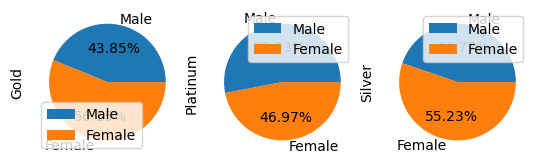

In [29]:
final_aggregate.plot(kind='pie',subplots='true',labels=['Male','Female'],autopct='%1.2f%%')

In [287]:
final.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Aler_flag,DOB_Year,current_year,Age,Age_Type
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0,1979,2023,44,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,2070-01-13,ME,265-543-1264,Silver,1,2070,2023,-47,Children
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0,1984,2023,39,Adult
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,0,1984,2023,39,Adult
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,0,1986,2023,37,Adult


In [290]:
final_incident_cause.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Aler_flag,DOB_Year,current_year,Age,Age_Type
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0,1979,2023,44,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0,1984,2023,39,Adult
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,0,1984,2023,39,Adult
8,24050443,21831191,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,Male,1977-05-17,NH,419-712-8513,Gold,0,1977,2023,46,Adult
9,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1.0,No,Male,1977-05-17,NH,419-712-8513,Gold,1,1977,2023,46,Adult


In [30]:
gender_wise = final_incident_cause.groupby(['gender'])[['claim_amount']].sum()

<AxesSubplot:xlabel='gender'>

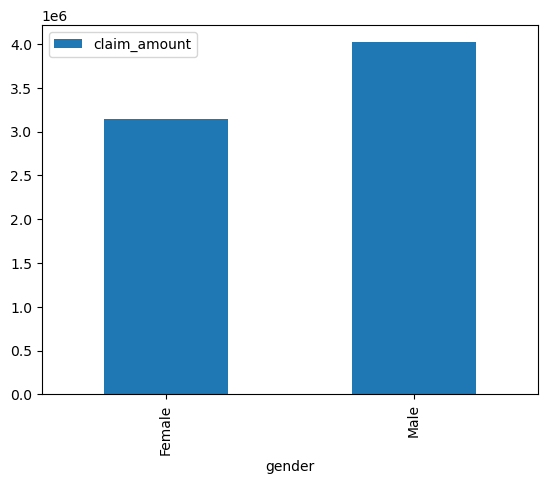

In [31]:
gender_wise.plot(kind='bar',stacked = True)

In [296]:
final.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Aler_flag,DOB_Year,current_year,Age,Age_Type
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0,1979,2023,44,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,2070-01-13,ME,265-543-1264,Silver,1,2070,2023,-47,Children
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0,1984,2023,39,Adult
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,0,1984,2023,39,Adult
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,0,1986,2023,37,Adult


In [32]:
fraud = final[final['fraudulent']=='Yes']
fraud.head(1)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Aler_flag,DOB_Year,current_year,Age,Age_Type
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0,1984,2023,39,Adult


In [33]:
fraud_age_type =fraud.groupby(['Age_Type'])[['fraudulent']].count()

<AxesSubplot:xlabel='Age_Type'>

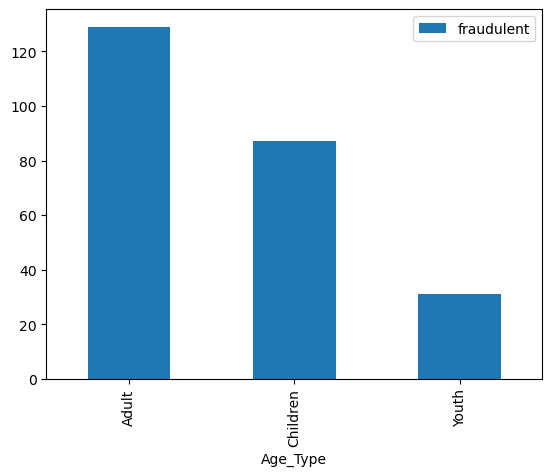

In [313]:
fraud_age_type.plot(kind ='bar',stacked = True)

In [315]:
final.head(1)


,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Aler_flag,DOB_Year,current_year,Age,Age_Type
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0,1979,2023,44,Adult


In [34]:
final['Month_no'] = final['claim_date'].apply(lambda x: x.month)
final.head(1)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,...,DateOfBirth,State,Contact,Segment,Aler_flag,DOB_Year,current_year,Age,Age_Type,Month_no
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,...,1979-01-12,VT,789-916-8172,Platinum,0,1979,2023,44,Adult,11


In [35]:
final['Year'] = final['claim_date'].apply(lambda x: x.year)

In [36]:
final_graph = final.groupby(['Year','Month_no'])[['claim_amount']].sum()

<AxesSubplot:xlabel='Year,Month_no'>

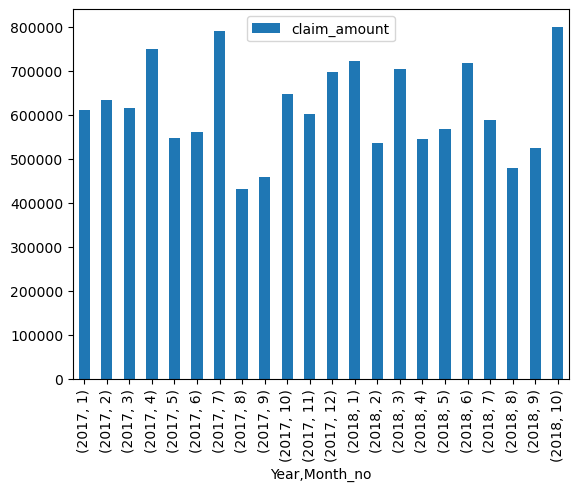

In [37]:
final_graph.plot(kind ='bar',stacked = True)

In [38]:
graph = final.pivot_table(index = ['gender','Age_Type'],columns =['fraudulent'],values = ['claim_amount'],aggfunc = 'mean')

<AxesSubplot:xlabel='gender,Age_Type'>

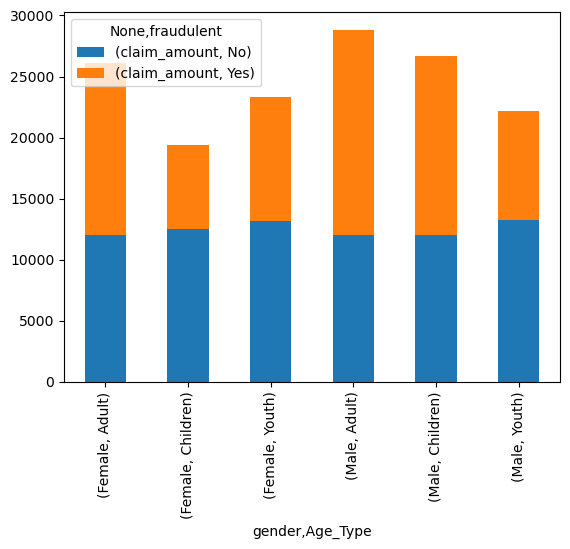

In [39]:
graph.plot(kind = 'bar',stacked = True)

In [47]:
final.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,...,State,Contact,Segment,Aler_flag,DOB_Year,current_year,Age,Age_Type,Month_no,Year
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,...,VT,789-916-8172,Platinum,0,1979,2023,44,Adult,11,2017
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,...,ME,265-543-1264,Silver,1,2070,2023,-47,Children,10,2018


In [40]:
## 16. Is there any similarity in the amount claimed by males and females?
Gender = final.groupby(['gender'])[['claim_amount']].mean()


In [41]:
male = final.loc[ final.gender == 'Male', 'claim_amount' ]
female = final.loc[ final.gender == 'Female', 'claim_amount']
male_mean = male.mean()
female_mean = female.mean()

In [42]:
# Null Hypothesis:There is similarity in the amount claimed by males and females
# Alternate Hypothesis:There is no similarity in the amount claimed by males and females
# Significant values:0.05
# Experiment
import scipy.stats as stats
_,p_value=stats.ttest_ind(a=male,b=female,equal_var=False)
# Since p-value > Significant_value
# we conclude to say that we are failed to reject null Hypothesis

In [71]:
## Ques_17. Is there any relationship between age category and segment?
final.columns

Index(['claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment',
       'Aler_flag', 'DOB_Year', 'current_year', 'Age', 'Age_Type', 'Month_no',
       'Year'],
      dtype='object')

In [54]:
Q17 =pd.crosstab(final['Segment'],final['Age_Type'])

In [58]:
# Null Hypothesis: There is relationship between age category and segment? 
# Alternate Hypothesis: There is no relationship between age category and segment?
# Significance value: 0.05
Chi_Test=stats.chi2_contingency(Q17)
p_value = Chi_Test[1]
# Since p-value is greater than Significance value
# we can conclude that we are failed to reject null hypothesis


In [44]:
## Ques 18 The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.
print('Claimed amount mean is',final['claim_amount'].mean())
claim_amount=final['claim_amount']

Claimed amount mean is 12467.681372549034


In [45]:
_,p_value = stats.ttest_1samp(a=claim_amount,popmean=10000)

In [46]:
# Null Hypothesis: Mean > 10000
# Alternate Hypothesis: Mean < 10000
# Significance value: 0.05
# Expeiment: (_,p_value) = stats.ttest_1samp(a=claim_amount,popmean=10000)
# Since p-value is greater than Significance value
# we can conclude that we are failed to reject null hypothesis

In [47]:
## Ques 19. Is there any difference between age groups and insurance claims?
Adult_claim_amount = final.loc[final['Age_Type'] == 'Adult','claim_amount']
Adult_claim_amount
Children_claim_amount = final.loc[final['Age_Type'] == 'Children','claim_amount']
Youth_claim_amount = final.loc[final['Age_Type'] == 'Youth','claim_amount']

In [48]:
stats.f_oneway(Adult_claim_amount,Children_claim_amount,Youth_claim_amount)

F_onewayResult(statistic=0.5434350408775986, pvalue=0.5809083481652482)

In [1]:
# Null Hypothesis: There is no difference between age group  and insurance claim
# Alternate Hypothesis: There is difference between age group and insurance claim
# Significance value: 0.05
# Expeiment: (stats.f_oneway(Adult_claim_amount,Children_claim_amount,Youth_claim_amount))
# Since p-value is greater than Significance value
# we can conclude that we are failed to reject null hypothesis

In [50]:
## Ques 20. Is there any relationship between total number of policy claims and the claimed amount?
final.head()
Claim1 = final.loc[ final['total_policy_claims'] == 1.0, 'claim_amount' ]
Claim2 = final.loc[ final['total_policy_claims'] == 2.0, 'claim_amount' ]
Claim3 = final.loc[ final['total_policy_claims'] == 3.0, 'claim_amount' ]
Claim4 = final.loc[ final['total_policy_claims'] == 4.0, 'claim_amount' ]
Claim5 = final.loc[ final['total_policy_claims'] == 5.0, 'claim_amount' ]
Claim6 = final.loc[ final['total_policy_claims'] == 6.0, 'claim_amount' ]
Claim7 = final.loc[ final['total_policy_claims'] == 7.0, 'claim_amount' ]
Claim8 = final.loc[ final['total_policy_claims'] == 8.0, 'claim_amount' ]


In [51]:
stats.f_oneway(Claim1,Claim2,Claim3,Claim4,Claim5,Claim6,Claim7,Claim8)

F_onewayResult(statistic=0.8524279319141894, pvalue=0.5439242016439254)

In [ ]:
# Null Hypothesis: There is relationship between total number of policy claims and the claimed amount
# Alternate Hypothesis: There is no relationship between total number of policy claims and the claimed amount
# Significance value: 0.05
# Since p-value is greater than Significance value
# we can conclude that we are failed to reject null hypothesis